<a href="https://colab.research.google.com/github/danielturmina/SMD-IF1014/blob/main/EDA_Credit_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Universidade Federal de Pernambuco**

**Curso: Sistemas de Informação**

**Disciplina: Soluções em Mineração de Dados – IF1014**

Alunos:

Daniel Freire Turmina - dft@cin.ufpe.br

Vinicius Santiago Bezerra - vsb@cin.ufpe.br

Yuri Correia de Barros - ycb@cin.ufpe.br

Yuri Rodrigues de Alencar Lopes - yral@cin.ufpe.br

## **ANÁLISE EXPLORATÓRIA DOS DADOS**

**Importando as bibliotecas**

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importação e Apresentação dos dados**

> Nessa seção, fazemos a importação dos dados e usamos a função head para os 10 primeiros valores da série de dados.


In [ ]:
#Especficando o nome da colunas
colunas= ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16']

#Importando Base de Dados
df = pd.read_csv("/crx.data", sep=",", names=colunas)

#Apresentado as 10 primeiras linhas
df.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


**Dados estatísticos principais**

> Gerando um conjunto de estatísticas descritivas: a quantidade de valores, a média, o desvio padrão, o valor mínimo, os quartis da distribuição e o valor máximo. Foram utilizadas as colunas A3, A8, A11 e A15.

In [ ]:
df.describe()

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


**Sumário do dataframe**

> Informações sobre o DataFrame, incluindo o dtype de índice e dtypes de coluna, valores não nulos e uso de memória.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


**Valores ausentes**

> Verificando a quantidade de valores ausentes por coluna. É possível perceber que todas as linhas estão preenchidas para todas as colunas.

In [ ]:
df.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

**Contagem de Linhas por Valor para a coluna A1**

> Contando os valores existentes na coluna A1. Percebe-se aqui que os valores ausentes foram substituídos por "?".


In [ ]:
df['A1'].value_counts()

b    468
a    210
?     12
Name: A1, dtype: int64

**Dimensão do DataFrame**

> O dataframe possui 690 linhas e 16 colunas.


In [ ]:
df.shape

(690, 16)

**Verificando correlação entre as colunas**

> Foram analisadas as colunas A3, A8, A11 e A15. Em cores escuras, estão as colunas fracamente correlacionados, já as claras são mais fortemente correlacionadas. Percebe-se que há baixa correlação entre os itens.

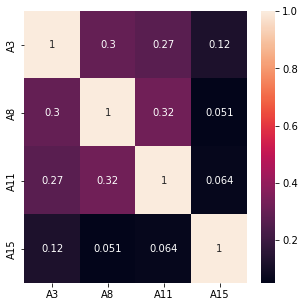

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True)

**Grafico de Barras com quantidade de elementos por tipo (Coluna A6)**

> Distribuição dos valores da coluna A6 no eixo X e a quantidade de ocorrências no eixo Y. Nota-se que a letra C é a que mais se repete, com um pouco mais de 130 ocorrências.

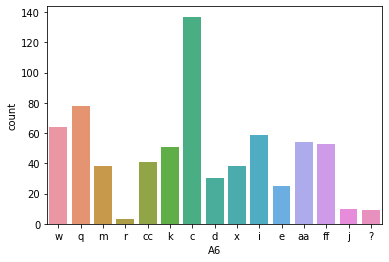

In [ ]:
sns.countplot(x='A6', data = df)

**Criando Boxplot para verificar Outliers**

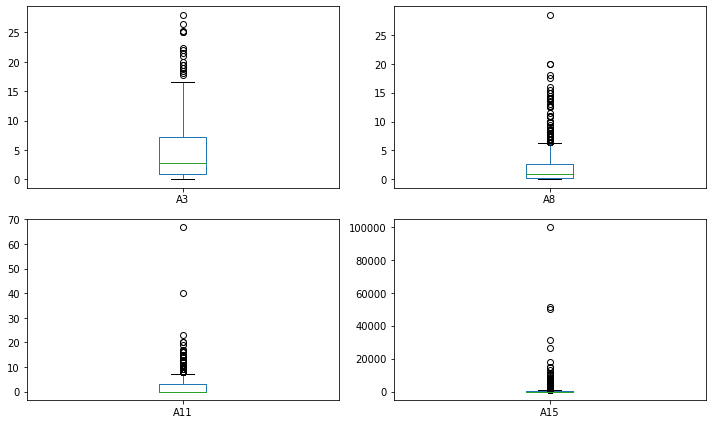

In [ ]:
plt.figure(figsize=(10,6))
lista = ['A3','A8','A11','A15']
for i,col in enumerate(lista):
    plt.subplot(2,2,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()

**Histograma com estimativa de densidade**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

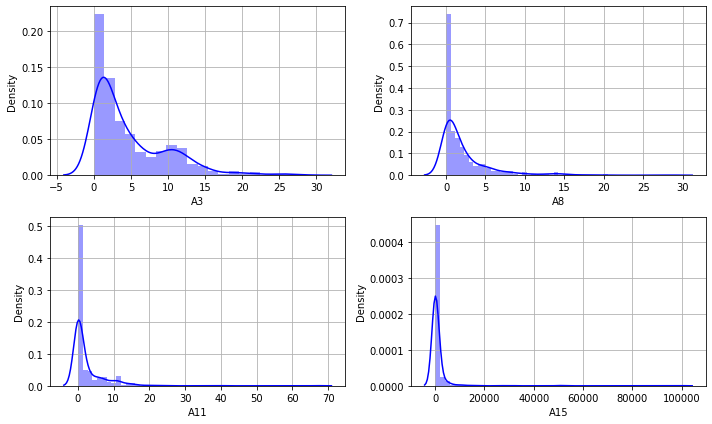

In [ ]:
plt.figure(figsize=(10,6))
lista = ['A3','A8','A11','A15']
for i,col in enumerate(lista):
    plt.subplot(2,2,i+1)
    sns.distplot(df[col], color='b', kde=True, label='data')
    plt.grid()
    plt.tight_layout() 

**Verificando Correlação entre as colunas**

> Para isso foram usados gráficos de dispersão.


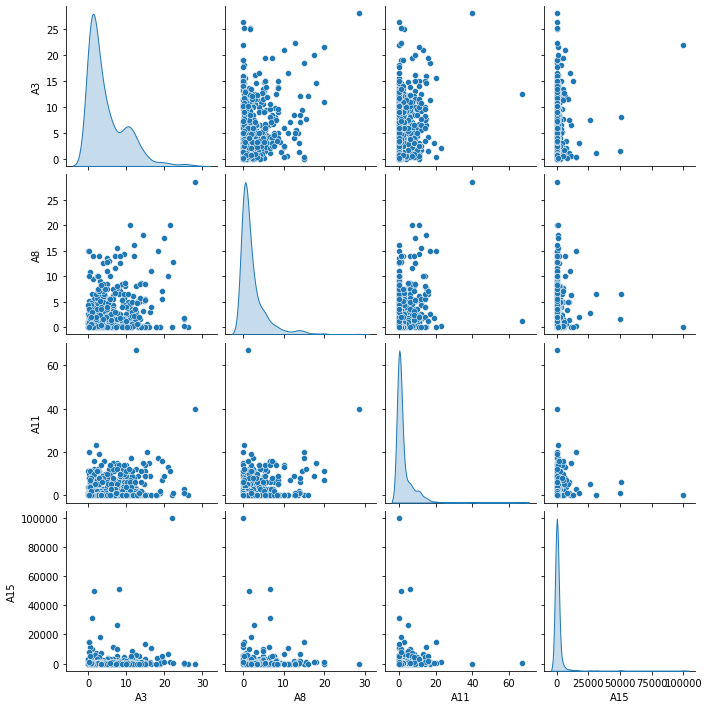

In [ ]:
sns.pairplot(data=df, kind='scatter',diag_kind='kde')

**Gerando Histogramas**

<Figure size 432x288 with 0 Axes>

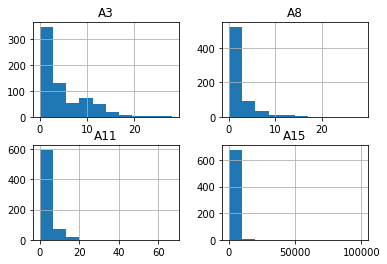

<Figure size 432x288 with 0 Axes>

In [ ]:
#Histogramas
df.hist()
plt.figure()

**Referências**

[1] https://towardsdatascience.com/top-6-python-libraries-for-visualization-which-one-to-use-fe43381cd658

[2] https://www.activestate.com/blog/exploratory-data-analysis-using-python/?utm_campaign=exploratory-data-analysis-blog&utm_medium=referral&utm_source=kdnuggets&utm_content=2019-08-07-kdnuggets-article

[3] https://medium.com/swlh/exploratory-data-analysis-eda-from-scratch-in-python-8c12c2673aa7